In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
iris = load_iris()
iris_df = pd.read_csv("C:\\Users\\DEV AMARNADH\\Downloads\\Iris.csv")
iris_df['species'] = iris.target_names[iris.target]
print(iris_df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species   
0   1            5.1           3.5            1.4           0.2  Iris-setosa  \
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


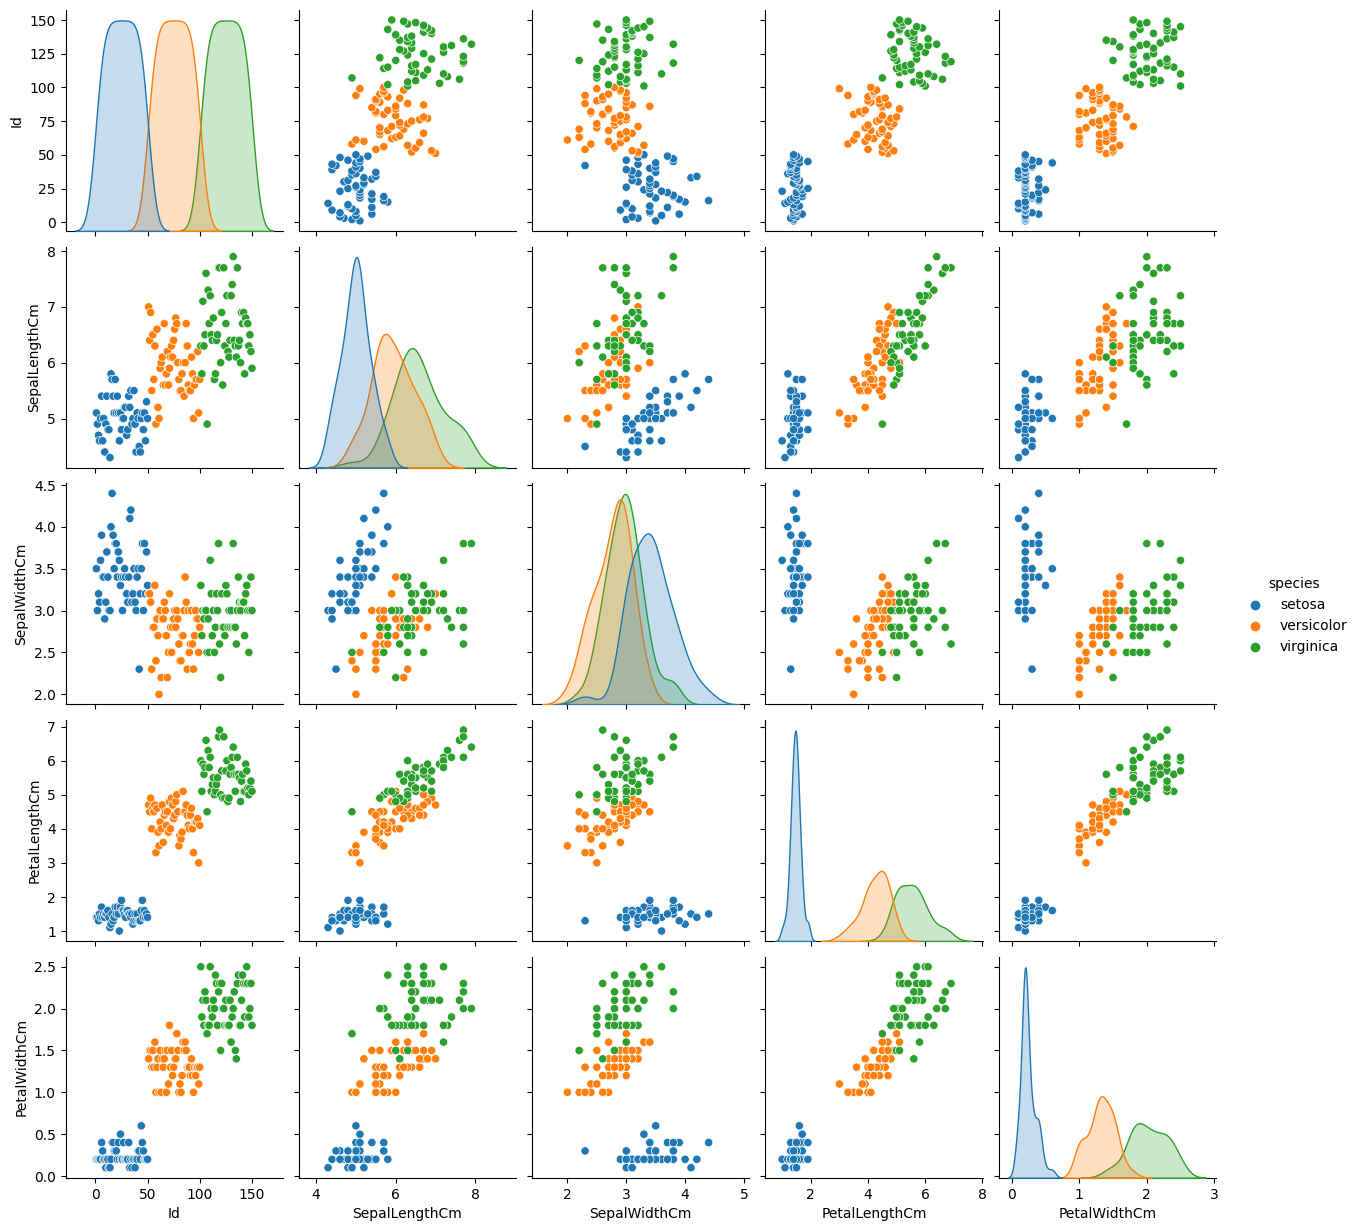

In [4]:
sns.pairplot(iris_df, hue='species')
plt.show()


In [5]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Training and Prediction

In [6]:
k = 3  # Number of neighbors for KNN
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)


# Model Evaluation

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Visualize the Confusion Matrix

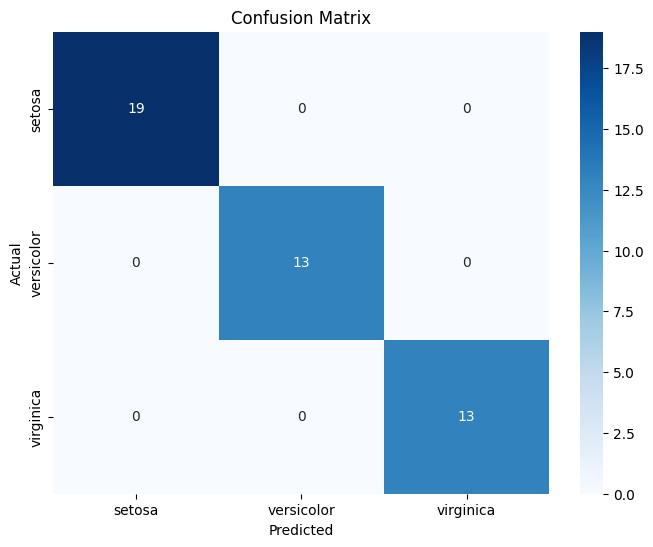

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
